In [3]:
import useful as us
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import scipy.ndimage
from scipy.ndimage import convolve
import skimage.feature

# Gaussian filtering

In [4]:
def gaussians(s, n=4):
    """
    Generates Gaussian kernels and their first and second derivatives.

    Parameters:
    s (float): The standard deviation of the Gaussian distribution.
    n (int, optional): The range multiplier to determine the kernel size. 
                       The range of x values will be from -n*s to +n*s. Default is 4.

    Returns:
    tuple: A tuple containing three numpy arrays:
        - g: The Gaussian kernel.
        - dg: The first derivative of the Gaussian kernel.
        - ddg: The second derivative of the Gaussian kernel.

    The Gaussian kernel is defined as:
        g(x) = (1 / (s * sqrt(2 * pi))) * exp(-x^2 / (2 * s^2))

    The first derivative of the Gaussian kernel is defined as:
        dg(x) = -x / (s^2) * g(x)

    The second derivative of the Gaussian kernel is defined as:
        ddg(x) = -x / (s^2) * dg(x) - 1 / (s^2) * g(x)

    Example:
    >>> g, dg, ddg = gaussians(1.0, 4)
    >>> print(g)    # Gaussian kernel
    >>> print(dg)   # First derivative of the Gaussian kernel
    >>> print(ddg)  # Second derivative of the Gaussian kernel
    """

    # Create a range of x values centered around zero, from -n*s to +n*s
    x = np.arange(-np.ceil(n*s), np.ceil(n*s) + 1)
    x = np.reshape(x, (-1, 1))  # Reshape x into a column vector

    # Gaussian kernel
    g = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-x**2 / (2 * s**2))
    
    # First derivative of the Gaussian kernel
    dg = -x / (s**2) * g
    
    # Second derivative of the Gaussian kernel
    ddg = -x / (s**2) * dg - 1 / (s**2) * g
    
    return g, dg, ddg

## Apply Gaussian Filtering

In [5]:
# Data directory
data_dir = 'data_week1/'

(-0.5, 0.5, 36.5, -0.5)

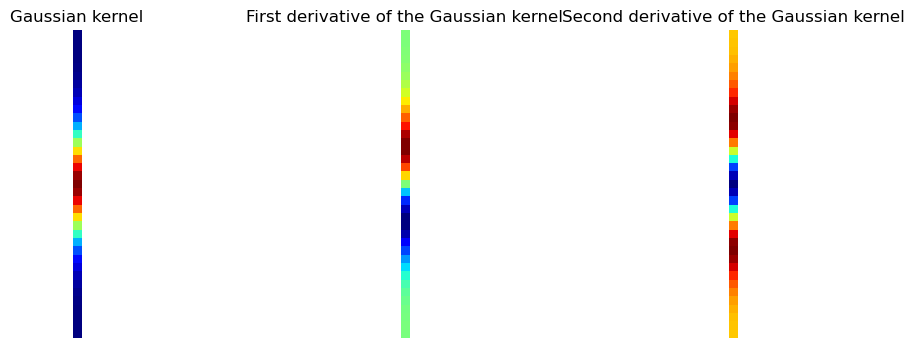

In [6]:
# Load the image
im = skimage.io.imread(data_dir + 'fibres_xcth.png').astype(float)

# Parameters of the Gaussian filter
s = 4.5
g, dg, ddg = gaussians(s)

# Display the Gaussian kernel
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(g, cmap='jet')
plt.title('Gaussian kernel')
plt.axis('off')

# Display the first derivative of the Gaussian kernel
plt.subplot(1, 3, 2)
plt.imshow(dg, cmap='jet')
plt.title('First derivative of the Gaussian kernel')
plt.axis('off')

# Display the second derivative of the Gaussian kernel
plt.subplot(1, 3, 3)
plt.imshow(ddg, cmap='jet')
plt.title('Second derivative of the Gaussian kernel')
plt.axis('off')

### 1D Gaussian Filtering

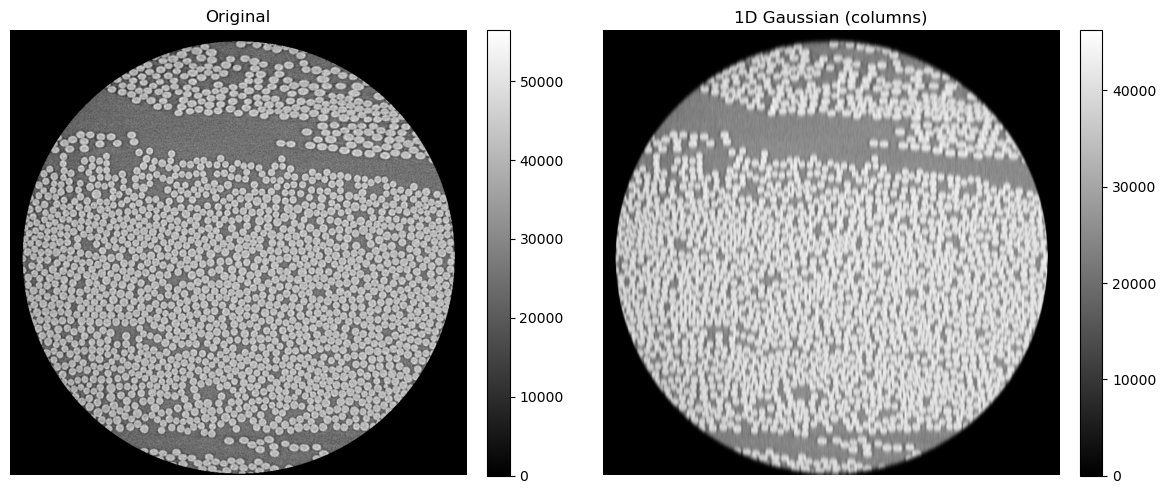

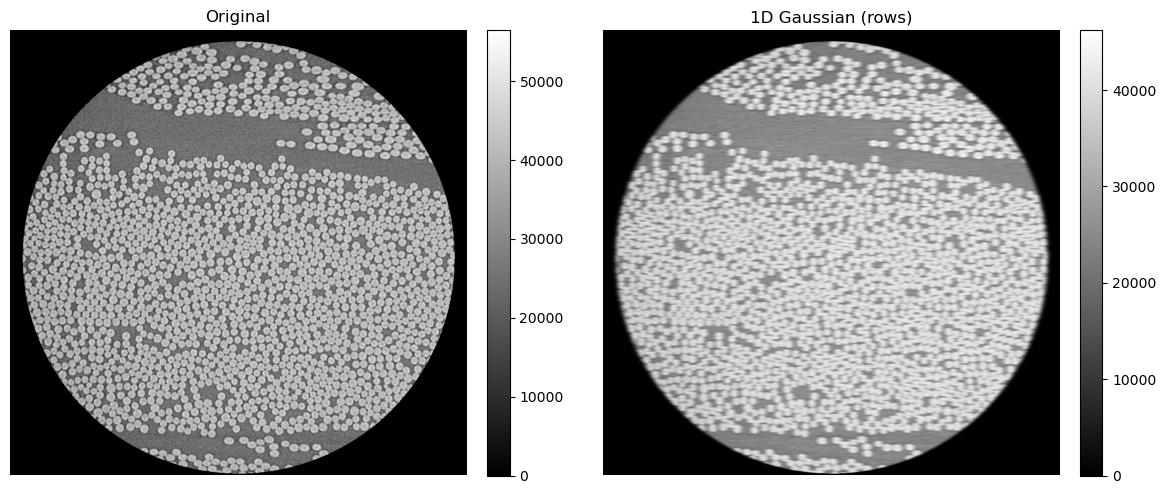

In [7]:
# Parameters of the Gaussian filter
s = 4.5
g, dg, ddg = gaussians(s)

# Apply 1D Gaussian filter along the columns of the image
im_1D_col = convolve(im, g)

# Apply 1D Gaussian filter along the rows of the image
im_1D_row = convolve(im, g.T)

# Display the original image and the filtered images
us.display_images([im, im_1D_col], ['Original', '1D Gaussian (columns)'])
us.display_images([im, im_1D_row], ['Original', '1D Gaussian (rows)'])

### 2D Gaussian Filtering

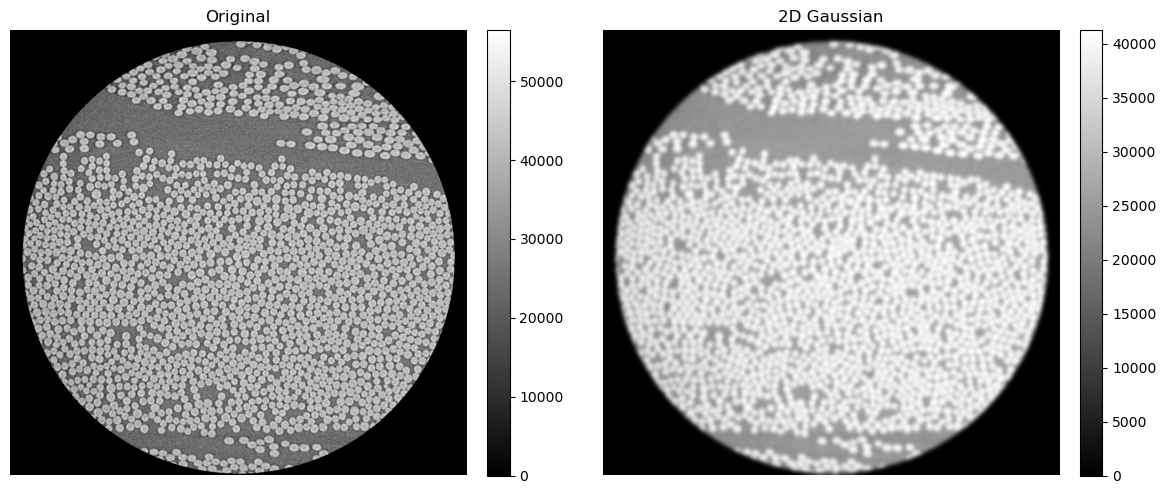

In [8]:
# Parameters of the Gaussian filter
s = 4.5
g, dg, ddg = gaussians(s)

# 2D Gaussian filter
g2D = g @ g.T

# Apply 2D Gaussian filter to the image
im_2D = convolve(im, g2D)

# Display the original image and the filtered image
us.display_images([im, im_2D], ['Original', '2D Gaussian'])

### 1D First derivative of the Gaussian filter

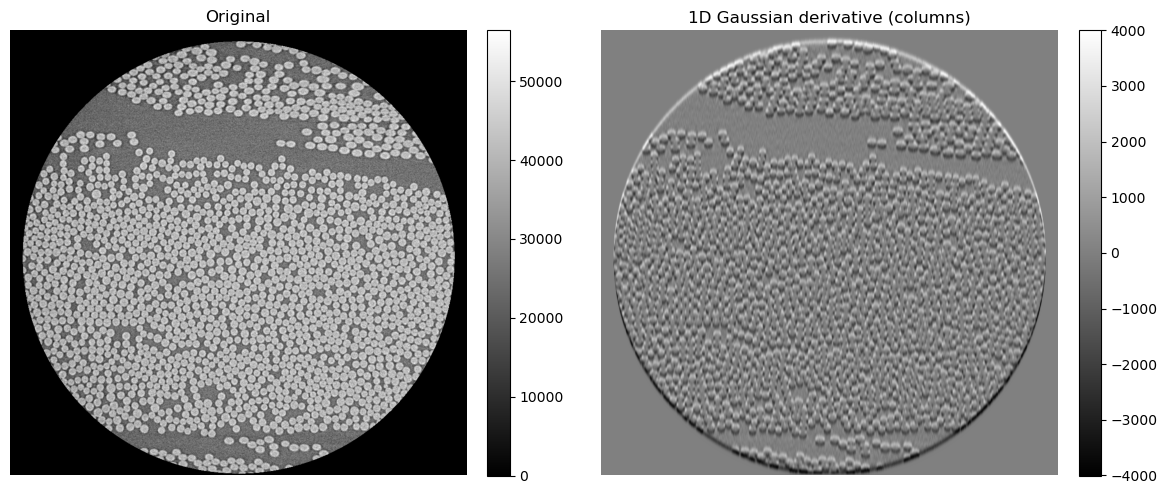

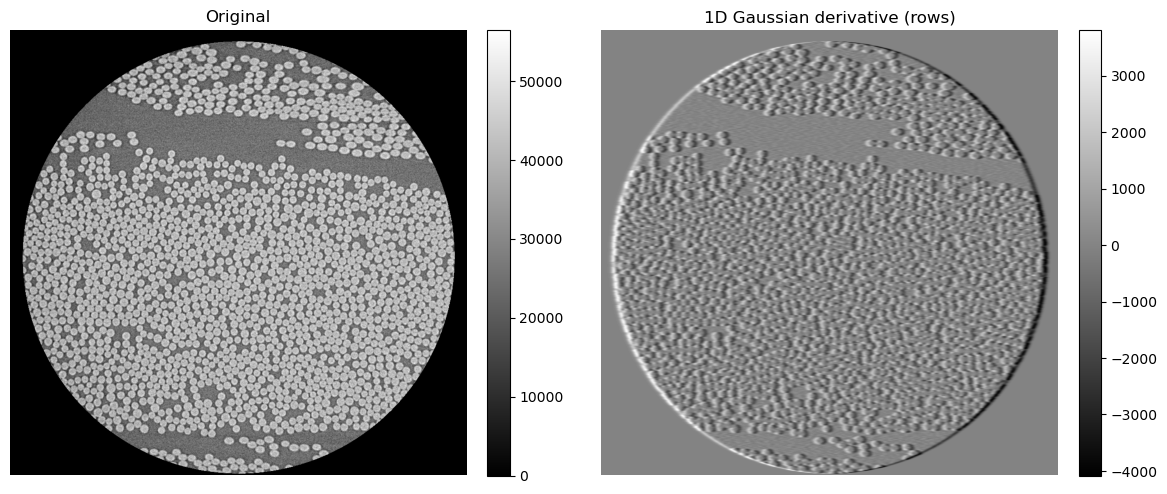

In [9]:
# Parameters of the Gaussian filter
s = 4.5
g, dg, ddg = gaussians(s)

# Apply the first derivative of the Gaussian filter along the columns of the image
im_1D_col_d = convolve(im, dg)

# Apply the first derivative of the Gaussian filter along the rows of the image
im_1D_row_d = convolve(im, dg.T)

# Display the original image and the filtered images
us.display_images([im, im_1D_col_d], ['Original', '1D Gaussian derivative (columns)'])
us.display_images([im, im_1D_row_d], ['Original', '1D Gaussian derivative (rows)'])

### 1D Central difference

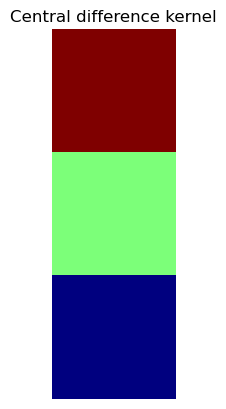

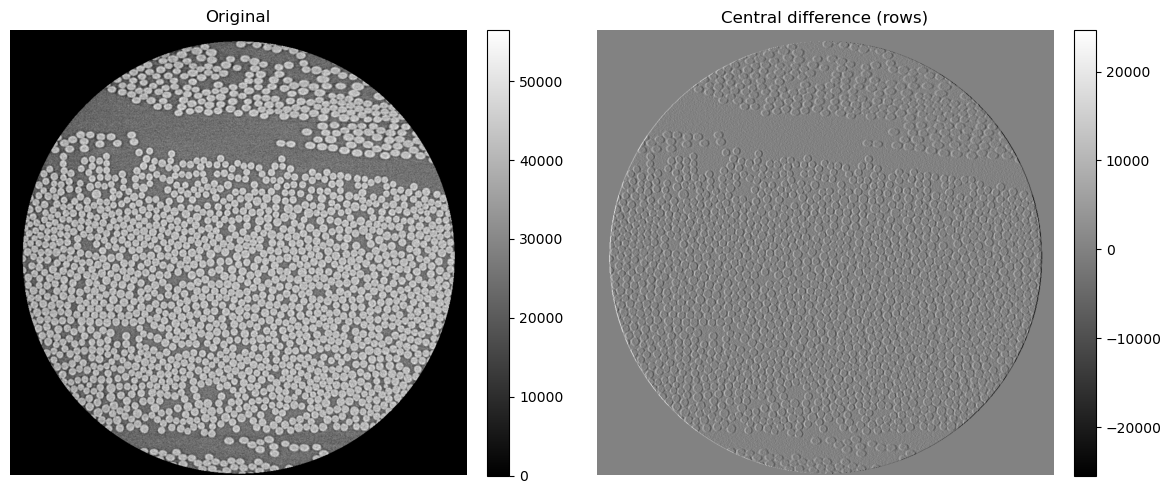

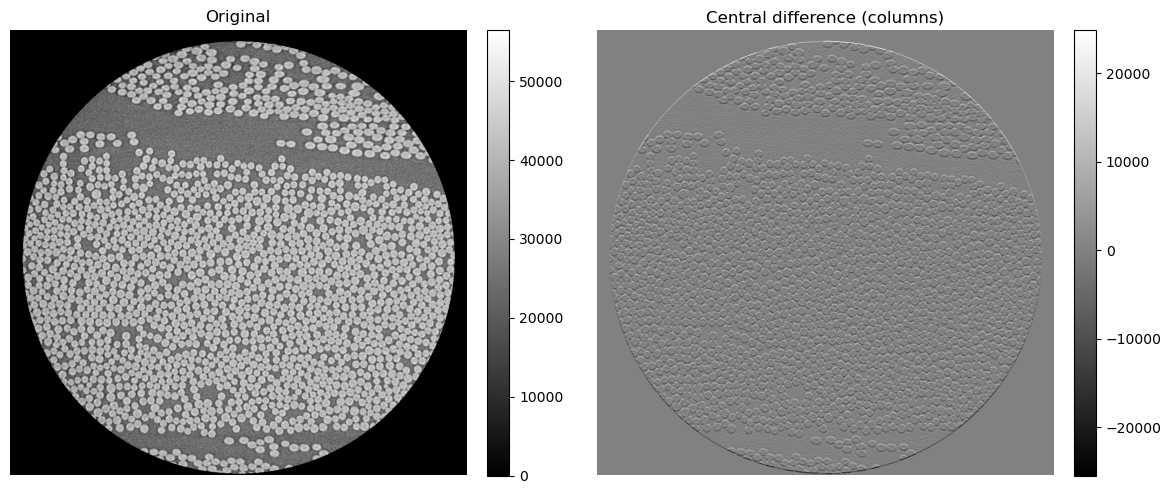

In [10]:
# Kernel for central difference
k = np.array([[0.5, 0, -0.5]]).T

# Display the kernel
plt.figure()
plt.imshow(k, cmap='jet')
plt.title('Central difference kernel')
plt.axis('off')

# Apply the central difference along the columns of the image
im_central_col = convolve(im, k)

# Apply the central difference along the rows of the image
im_central_row = convolve(im, k.T)

# Display the original image and the filtered images
us.display_images([im, im_central_row], ['Original', 'Central difference (rows)'])
us.display_images([im, im_central_col], ['Original', 'Central difference (columns)'])

### 1D Central diff + Gaussian

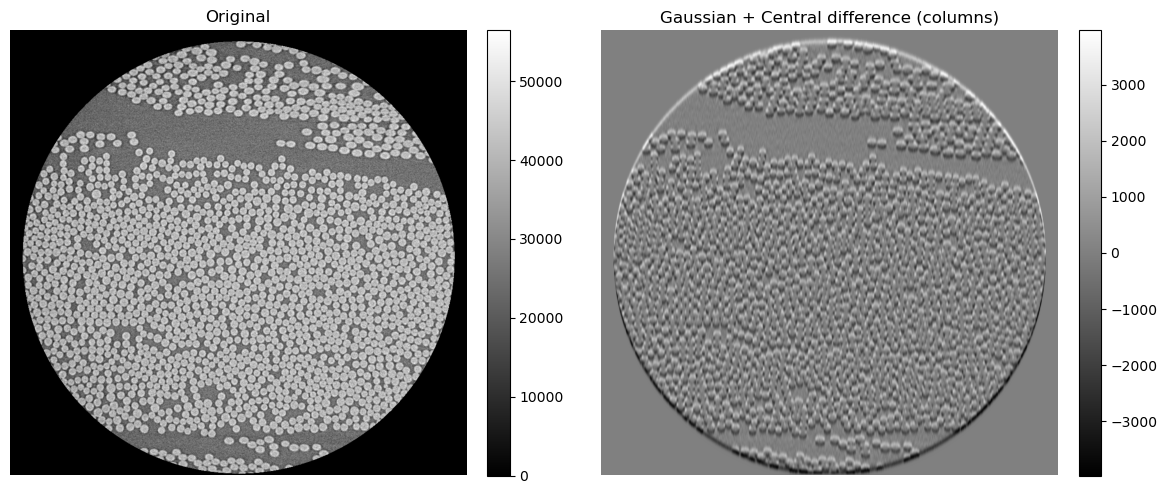

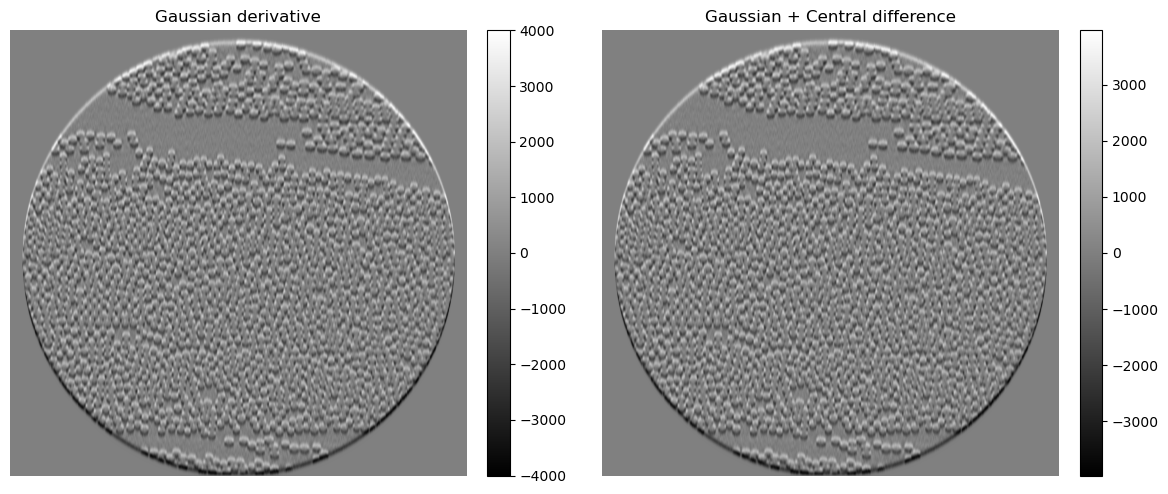

In [11]:
# Parameters of the Gaussian filter
s = 4.5
g, dg, ddg = gaussians(s)

# Kernel for the central difference
k = np.array([[0.5, 0, -0.5]]).T

# Apply the gaussian filter along the columns of the image
im_1D_col = convolve(im, g)

# Apply the central difference along the columns of the image
im_central_col = convolve(im_1D_col, k)

# Display the original image and the filtered image
us.display_images([im, im_central_col], ['Original', 'Gaussian + Central difference (columns)'])

# Display im_1D_col_d and im_central_col
us.display_images([im_1D_col_d, im_central_col], ['Gaussian derivative', 'Gaussian + Central difference'])

## Display kernels

(-0.5, 10.5, 10.5, -0.5)

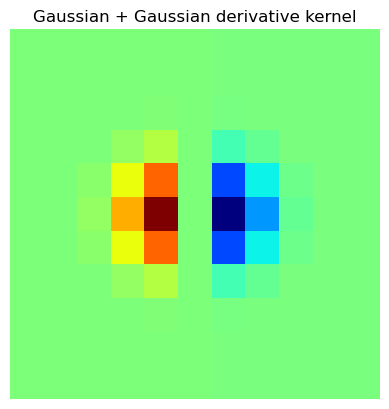

In [12]:
# Parameters of the Gaussian filter
s = 1
g, dg, ddg = gaussians(s, 5)

# Kernel
kernel = g @ dg.T

# Display the kernel
plt.figure()
plt.imshow(kernel, cmap='jet')
plt.title('Gaussian + Gaussian derivative kernel')
plt.axis('off')

## Laplacian of the Gaussian LoG

In [13]:
data_dir = 'data_2023/'

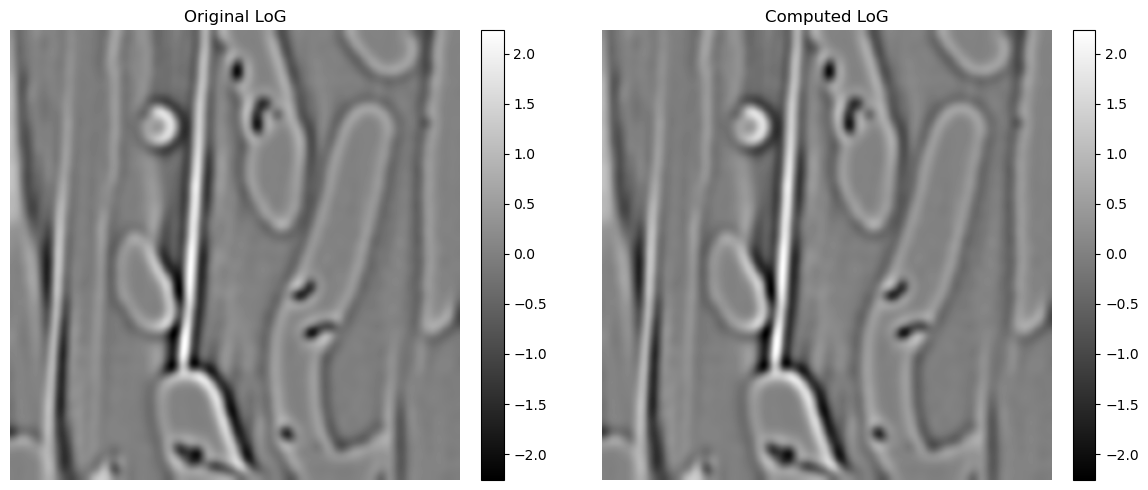

In [14]:
# Parameters of the Gaussian filter
s = 5.5
g, dg, ddg = gaussians(s)

# Load the images
im = skimage.io.imread(f'{data_dir}wood.png').astype(np.float32)
LoG = skimage.io.imread(f'{data_dir}wood_LoG.tif')

# Compute the Laplacian of Gaussian (LoG) using the Gaussian and Gaussian derivative kernels
Lxx = convolve(convolve(im, ddg), g.T)
Lyy = convolve(convolve(im, ddg.T), g)

# Compute the LoG
LoG_computed = Lxx + Lyy

# Display the original LoG and the computed LoG
us.display_images([LoG, LoG_computed], ['Original LoG', 'Computed LoG'])

### Function

In [15]:
def laplacian_of_gaussian(im, s, n=4):
    """
    Compute the Laplacian of Gaussian (LoG) of an image.

    Parameters:
    im (numpy.ndarray): Input image.
    s (float): Standard deviation of the Gaussian distribution.
    n (int, optional): Range multiplier to determine the kernel size. Default is 4.

    Returns:
    numpy.ndarray: Image after applying the Laplacian of Gaussian.
    """
    g, dg, ddg = gaussians(s, n)

    # Convolve image with second-order Gaussian derivatives in x and y directions
    Lxx = scipy.ndimage.convolve(scipy.ndimage.convolve(im, ddg), g.T)
    Lyy = scipy.ndimage.convolve(scipy.ndimage.convolve(im, ddg.T), g)

    # Laplacian of Gaussian
    LoG = Lxx + Lyy

    return LoG

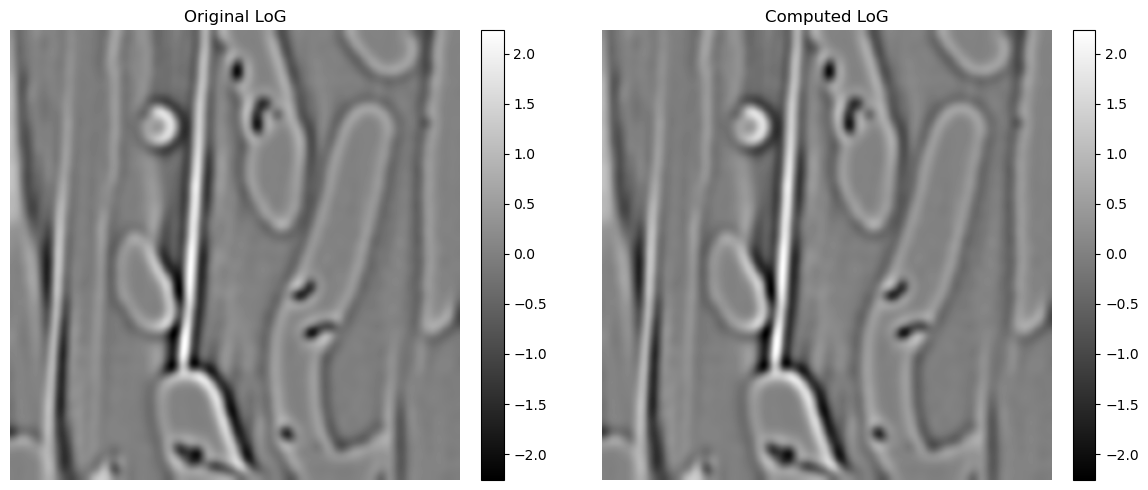

In [16]:
# Parameters of the Gaussian filter
s = 5.5
g, dg, ddg = gaussians(s)

# Load the images
im = skimage.io.imread(f'{data_dir}wood.png').astype(np.float32)
LoG = skimage.io.imread(f'{data_dir}wood_LoG.tif')

# Compute the Laplacian of Gaussian (LoG) using the Gaussian and Gaussian derivative kernels
LoG_computed = laplacian_of_gaussian(im, s)

# Display the original LoG and the computed LoG
us.display_images([LoG, LoG_computed], ['Original LoG', 'Computed LoG'])